In [11]:
import speech_recognition as sr
from os import path
import os.path
import operator
from os import system
from os import listdir
from os.path import isfile, join
import wave
import scipy as sc
import librosa
import IPython.display as ipd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline
import math
import librosa as lb
import scipy
from sklearn.decomposition import PCA
import pandas as pd
from os import listdir
from os.path import isfile, join
import time
from itertools import product
import datetime
import sys

In [15]:
fs, data = scipy.io.wavfile.read(r"C:\Users\hamza\OneDrive\Desktop\ResearchML\AudioFiles\helloAudio.wav")
length = len(data)

print("This is the length of the data:", len(data))
print("This is the data printed\n", data[-100:])

This is the length of the data: 216960
This is the data printed
 [-364 -334 -304 -273 -334 -304 -334 -334 -334 -334 -304 -304 -304 -334
 -334 -364 -334 -273 -213 -243 -243 -273 -243 -152 -152 -152 -152 -182
 -213 -182 -182 -121  -91 -182 -152 -182 -152 -121 -152 -121 -152 -152
 -182 -213 -213 -213 -213 -182 -213 -213 -213 -213 -152  -91  -61  -30
  -61  -61  -30  -30   61   91  121  121  121  121   91   91   91  121
  152  121   91   61   30   30   30    0    0    0    0  -61  -91 -121
  -91 -121 -121  -61  -61  -61 -121 -121 -121 -121 -121  -91  -91 -182
 -213 -213]


In [26]:
print(type(data))

<class 'numpy.ndarray'>


In [31]:
a = data
print("This is the last 20 numbers of the data:\n\n",a[-20:])

This is the last 20 numbers of the data:

 [   0  -61  -91 -121  -91 -121 -121  -61  -61  -61 -121 -121 -121 -121
 -121  -91  -91 -182 -213 -213]


C:\Users\hamza\Anaconda3\envs\python3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Creates a list of the complex numbers
 [-2.42218600e+06+1.22079065e-12j  5.41395287e+06-1.71884829e+06j
 -4.12716940e+03-4.76579598e+06j -2.71828325e+06-2.53329992e+06j
 -2.73713495e+06+6.22371223e+05j -1.13171706e+06+8.00010079e+05j
 -4.04827031e+05+1.53931476e+06j  4.03159655e+05+5.43399991e+05j
  2.53370002e+05+7.39882048e+05j  7.48020231e+05-1.54424706e+05j
  1.99148101e+05-5.60297114e+04j  2.57639175e+05+1.87225303e+05j
  3.28681696e+05-2.17465112e+05j  7.24677825e+04-4.55849951e+05j
  1.35118752e+05-3.07412932e+05j] 


This is half of the spectrum
 [-2.42218600e+06+1.22079065e-12j  5.41395287e+06-1.71884829e+06j
 -4.12716940e+03-4.76579598e+06j -2.71828325e+06-2.53329992e+06j
 -2.73713495e+06+6.22371223e+05j -1.13171706e+06+8.00010079e+05j
 -4.04827031e+05+1.53931476e+06j  4.03159655e+05+5.43399991e+05j
  2.53370002e+05+7.39882048e+05j  7.48020231e+05-1.54424706e+05j
  1.99148101e+05-5.60297114e+04j  2.57639175e+05+1.87225303e+05j
  3.28681696e+05-2.17465112e+05j  7.24677825e+04-

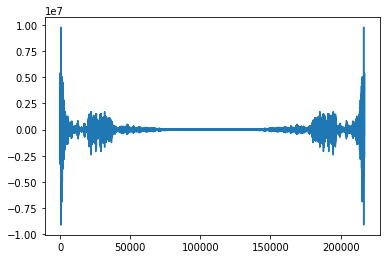

In [36]:
#fast fourrier transform
#This is the FFT of the data
b = sc.fft(a)
plt.plot(b)
print("Creates a list of the complex numbers\n",b[:15],"\n")


#Gets half of the spectrum, using ceil to obtain the middle value in case of an odd length
c= b[0:int(np.ceil((length+1)/2.0))] 
print("\nThis is half of the spectrum\n", c[:15])
#print("\n","Validates this is only half of the length:" ,len(b), ", ", len(c))

In [44]:
#take the magnitude of the FFT
magFreq = np.absolute(c)
print(magFreq[:15])

magFreq2 = magFreq

[2422186.         5680257.48734253 4765797.76718502 3715733.08155164
 2807000.83143571 1385929.15741219 1591657.89419659  676624.90204645
  782062.53107702  763793.98800888  206879.90418006  318482.74415959
  394110.05073129  461574.21608668  335797.24232018]


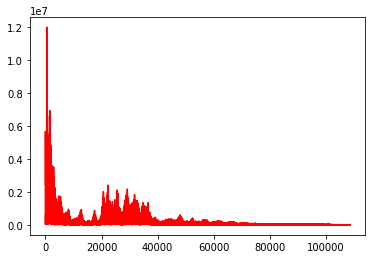

In [38]:
plt.plot(magFreq, 'r')
plt.show()

In [48]:
magFreq2[:10]

array([2422186.        , 5680257.48734253, 4765797.76718502,
       3715733.08155164, 2807000.83143571, 1385929.15741219,
       1591657.89419659,  676624.90204645,  782062.53107702,
        763793.98800888])

In [49]:
magFreq2

array([2.42218600e+06, 5.68025749e+06, 4.76579777e+06, ...,
       5.80017803e+03, 5.61714793e+03, 8.00000000e+02])

In [52]:
scipy.io.wavfile.write(r"C:\Users\hamza\OneDrive\Desktop\ResearchML\AudioFiles\helloAudioTest.wav", fs, magFreq2)
transcribe(r"C:\Users\hamza\OneDrive\Desktop\ResearchML\AudioFiles\helloAudioTest.wav", "google")

ValueError: Audio file could not be read as PCM WAV, AIFF/AIFF-C, or Native FLAC; check if file is corrupted or in another format

In [51]:
def transcribe(my_path,model):
    wit_key = ''

    AUDIO_FILE =  path.join(my_path)

    # use the audio file as the audio source
    r = sr.Recognizer()
    with sr.AudioFile(my_path) as source:
        audio = r.record(source)  # read the entire audio file

    if(model == 'google'):
        # Google
        try:
            return r.recognize_google(audio)
        except sr.UnknownValueError:
             print("Google: -_-")
            
        except sr.RequestError as e:
            print("Google error; {0}".format(e))